In [1]:
import random

In [39]:
n_points = 1000000
grid_x = [ 0.25, 0.5, 0.75, 1.0 ]
grid_y = [ 0.25, 0.5, 0.75, 1.0 ]

In [53]:
def get_value():
    while True:
        v = abs(random.normalvariate(0, 0.4))
        if v<1.0:
            break
    return v

In [54]:
X = [ get_value() for i in range(n_points) ]
Y = [ get_value() for i in range(n_points) ]

In [55]:
import matplotlib.pyplot as plt

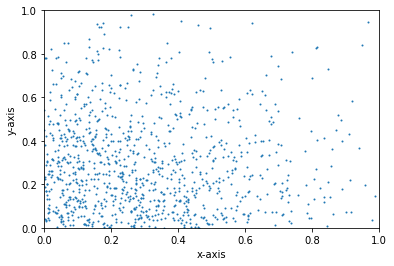

In [56]:
plt.scatter(X[:1000], Y[:1000], s=1)
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [59]:
f = open("{}.txt".format(n_points), "w")
f.write("{},{}\n".format(n_points, 2))
for i, x, y in zip(range(n_points), X, Y):
    f.write("{},{},{}\n".format(i,x, y))
f.close()

In [78]:
def get_interval(v, grid):
    for idx, bound in enumerate(grid):
        if v < bound:
            return idx

def count_stratum(X, grid_x, Y, grid_y):
    cnt = [ 0 for i in range(len(grid_x) * len(grid_y)) ]
    for x, y in zip(X, Y):
        cnt[get_interval(x, grid_x) + get_interval(y, grid_y) * len(grid_x)] += 1
    return cnt

In [80]:
f = open("{}.grid".format(n_points), "w")
f.write(",".join([ str(v) for v in grid_x ]))
f.write("\n")
f.write(",".join([ str(v) for v in grid_y ]))
f.write("\n")
f.write(",".join([ str(v) for v in count_stratum(X, grid_x, Y, grid_y) ]))
f.write("\n")
f.close()